# Case Study: Gastrulation Erythroid

## Import Packages

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pandas as pd
import math
import matplotlib.pyplot as plt

# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
srcdir = '/Users/shengyuli/Library/CloudStorage/OneDrive-HoustonMethodist/work/Velocity/bin/cellDancer_polish/src'
srcdir = '/Users/wanglab/Documents/ShengyuLi/Velocity/bin/celldancer_polish/src'
srcdir = '/Users/chen.weiqing/Documents/GitHub/cellDancer/src'
sys.path.append(srcdir)
from celldancer import velocity_estimation
from celldancer.compute_cell_velocity import compute_cell_velocity
from celldancer.pseudo_time import pseudo_time
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

## Velocity Estimation for Sample Genes

In [2]:
%autoreload 2

raw_path='/Users/chen.weiqing/code/celldancer/mouse_endo_blood20to25_2000_genes_moment100.csv'
load_raw_data=pd.read_csv(raw_path)

max_epoches=200
check_n_epoch=10
learning_rate=0.001
downsample_method='neighbors'
step_i=200
step_j=200
sampling_ratio=0.125
n_neighbors=30
optimizer='Adam'
n_neighbors_downsample=30
auto_downsample=True
auto_norm_u_s=True
cost_type='smooth'
smooth_weight=0.1
patience=3
binning=True

# gene_list=load_raw_data.gene_name.drop_duplicates()
gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Grb10','Rbms2']
folder_name=("epoch"+str(max_epoches)+"check_n"+str(check_n_epoch)+"Lr"+str(learning_rate)+"Down"+str(downsample_method)+"_"+str(step_i)+"_"+str(step_j)+"Ratio"+str(sampling_ratio)+"N"+str(n_neighbors)+"O"+str(optimizer)+"nD"+str(n_neighbors_downsample)+"autoD"+str(auto_downsample)+"autoN"+str(auto_norm_u_s)+"costT"+str(cost_type)+"smoW"+str(smooth_weight)+"p"+str(patience)+"bin"+str(binning))
result_path = '/Users/chen.weiqing/code/celldancer/Gastrulation/velocity_result/result_detailcsv/tunning_train/'+folder_name+'/'

# result_path = None

if not os.path.isdir(result_path):
    os.mkdir(result_path)

# Velocity Estimation
brief, load_cellDancer=velocity_estimation.train(load_raw_data,\
                                                 gene_choice=gene_list,\
                                                 max_epoches=max_epoches,\
                                                 check_n_epoch=check_n_epoch,\
                                                 learning_rate=learning_rate, \
                                                 downsample_method=downsample_method,\
                                                 step_i=step_i,\
                                                 step_j=step_j,\
                                                 sampling_ratio=sampling_ratio,\
                                                 n_neighbors=n_neighbors,\
                                                 optimizer=optimizer,\
                                                 n_neighbors_downsample=n_neighbors_downsample,\
                                                 auto_downsample=auto_downsample,\
                                                 auto_norm_u_s=auto_norm_u_s,\
                                                 cost_type=cost_type,\
                                                 smooth_weight=smooth_weight,\
                                                 patience=patience,\
                                                 binning=binning,\
                                                 result_path=result_path,n_jobs=1)

Using /Users/chen.weiqing/code/celldancer/Gastrulation/velocity_result/result_detailcsv/tunning_train/epoch200check_n10Lr0.001Downneighbors_200_200Ratio0.125N30OAdamnD30autoDTrueautoNTruecostTsmoothsmoW0.1p3binTrue/cell_dancer_velocity_2022-05-12 10-35-08 as the output path.
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


Velocity Estimation:   0%|                                                                    | 0/1 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------
---------------------------------------------

Velocity Estimation: 100%|████████████████████████████████████████████████████████████| 1/1 [01:17<00:00, 77.11s/it]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{}
--------------------------------------------------------------------------------


## Sample Genes' Velocity Plot

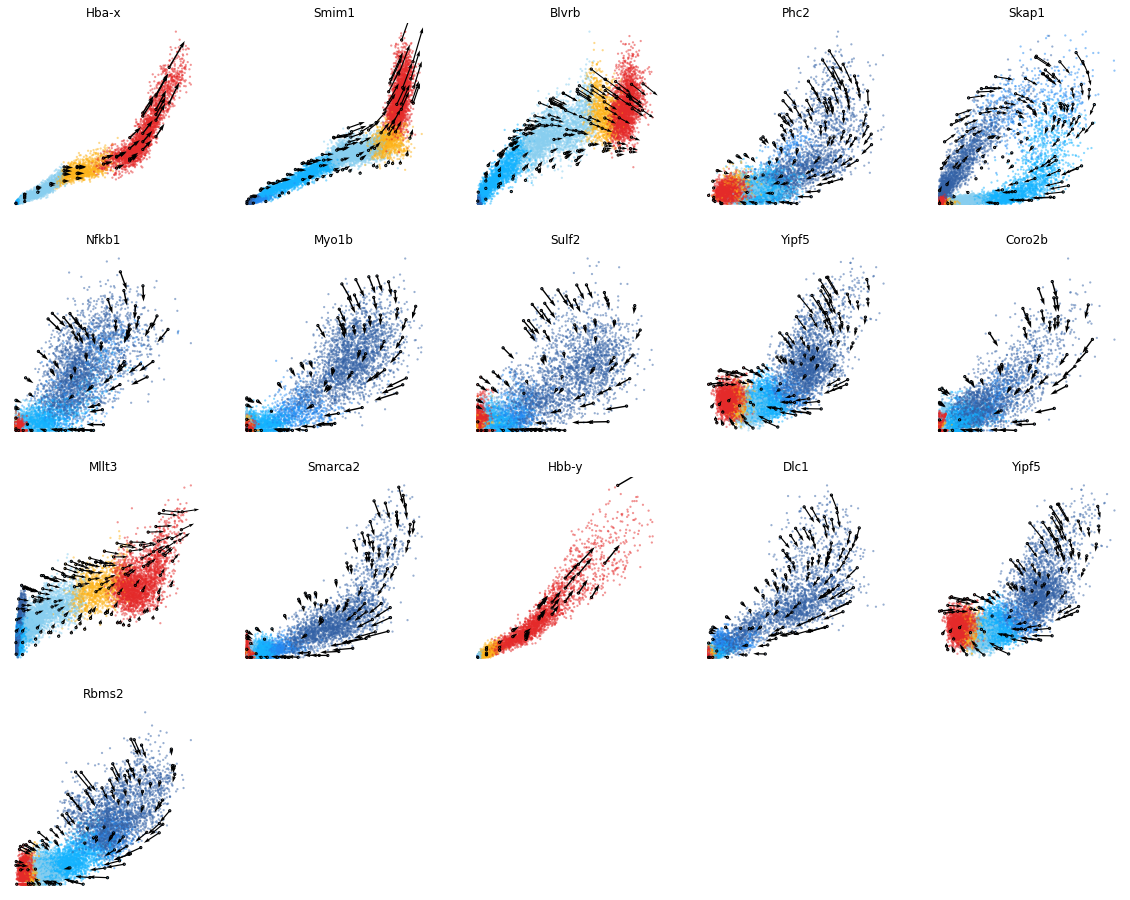

In [3]:
ncols=5


gene_list=['Hba-x','Smim1','Blvrb','Phc2',
           'Skap1','Nfkb1','Myo1b','Sulf2','Yipf5',
           'Coro2b','Mllt3','Smarca2','Hbb-y','Dlc1','Yipf5','Rbms2']
height=math.ceil(len(gene_list)/5)*4
fig = plt.figure(figsize=(20,height))

for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='spliced',
        y='unspliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=True,
        gene_name=gene_list[i])
    
    ax.set_title(gene_list[i])
    ax.axis('off')

plt.show()

## Load velocity estimation result of 2000 genes

In [4]:
#detail_file = '/Users/chen.weiqing/code/celldancer/combined_detail.csv'
detail_file = '/Users/chen.weiqing/code/celldancer/Gastrulation/velocity_result/result_detailcsv/tunning_train/epoch200check_n10Lr0.001Downneighbors_200_200Ratio0.125N30OAdamnD30autoDTrueautoNTruecostTsmoothsmoW0.1p3binTrue/cell_dancer_velocity_2022-05-11 23-05-25/celldancer_estimation.csv'

output_path = os.getcwd()
load_cellDancer=pd.read_csv(detail_file)
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2
0,0,Mllt3,0.061677,0.087552,0.353295,0.114199,0.199725,0.311105,0.320165,0.102612,cell_363,Blood progenitors 2,3.460521,15.574629
1,1,Mllt3,0.056451,0.042049,0.192087,0.084563,0.207654,0.302935,0.320095,0.102612,cell_382,Blood progenitors 2,2.490433,14.971734
2,2,Mllt3,0.073611,0.046162,0.222424,0.087551,0.207956,0.303383,0.320132,0.102612,cell_385,Blood progenitors 2,2.351203,15.267069
3,3,Mllt3,0.142994,0.119952,0.546677,0.134357,0.191526,0.315536,0.320353,0.102612,cell_393,Blood progenitors 2,5.899098,14.388825
4,4,Mllt3,0.136220,0.027221,0.220122,0.074768,0.210144,0.298748,0.320274,0.102612,cell_398,Blood progenitors 2,4.823139,15.374831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197259,12324,Yipf5,0.443361,0.098889,0.466853,0.104464,0.092566,0.197652,0.440246,0.060619,cell_139318,Erythroid3,8.032358,7.603037
197260,12325,Yipf5,0.521375,0.092605,0.531211,0.097990,0.087018,0.196785,0.442401,0.060619,cell_139321,Erythroid3,10.352904,6.446736
197261,12326,Yipf5,0.443695,0.108367,0.473820,0.112434,0.093452,0.197175,0.440505,0.060619,cell_139326,Erythroid3,9.464873,7.261099
197262,12327,Yipf5,0.431785,0.067904,0.434571,0.078566,0.090097,0.199403,0.439165,0.060619,cell_139327,Erythroid3,9.990495,7.243880


## Compute Cell Velocity and Estimate Pseudotime

In [5]:
# Set Parameters
n_neighbors=10
downsample_step=(100,100)
mode='gene'
transfer_mode='power10'
min_mass=15
grid_steps=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]
alpha_inside=0.3

# Compute Cell Velocity
gene_choice=list(set(load_cellDancer.gene_name))
load_cellDancer=compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=gene_choice,
              mode=mode,
              transfer_mode=transfer_mode,
              n_neighbors=n_neighbors,
              step=downsample_step)

(genes, cells): (16, 12329)
After downsampling, there are  951 cells.


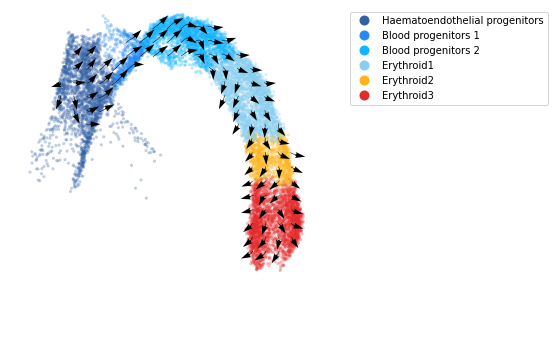

In [6]:
fig, ax = plt.subplots(figsize=(6,6))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_erythroid, alpha=alpha_inside, s=10,
             velocity=True, custom_xlim=custom_xlim, custom_ylim=custom_ylim, legend='on',min_mass=min_mass,grid_steps=grid_steps)
ax.axis('off')
plt.show()

## Estimate Pseudotime

In [7]:
%%capture
cell_time = dict()
dt = 0.01
t_total = {dt:int(10/dt)} 
n_repeats = 10
grid = (20,20)
pseudo_time(load_cellDancer, grid, dt, t_total[dt], downsample_step=downsample_step, n_repeats=n_repeats)

## Plot Pseudotime

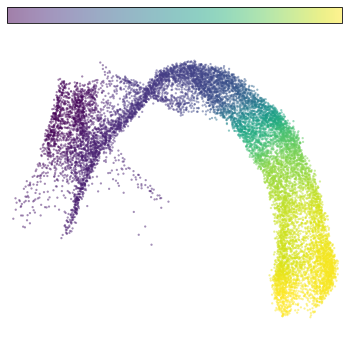

In [8]:
fig, ax = plt.subplots(figsize=(6,6))
clusters = load_cellDancer['clusters'].drop_duplicates().to_list()
im=cdplt.cell.scatter_cell(ax,load_cellDancer, colors='pseudotime', alpha=0.5, 
             velocity=False, custom_xlim=(-5,11), custom_ylim=(4,18))
ax.axis('off')
plt.show()

## Gene Pseudotime

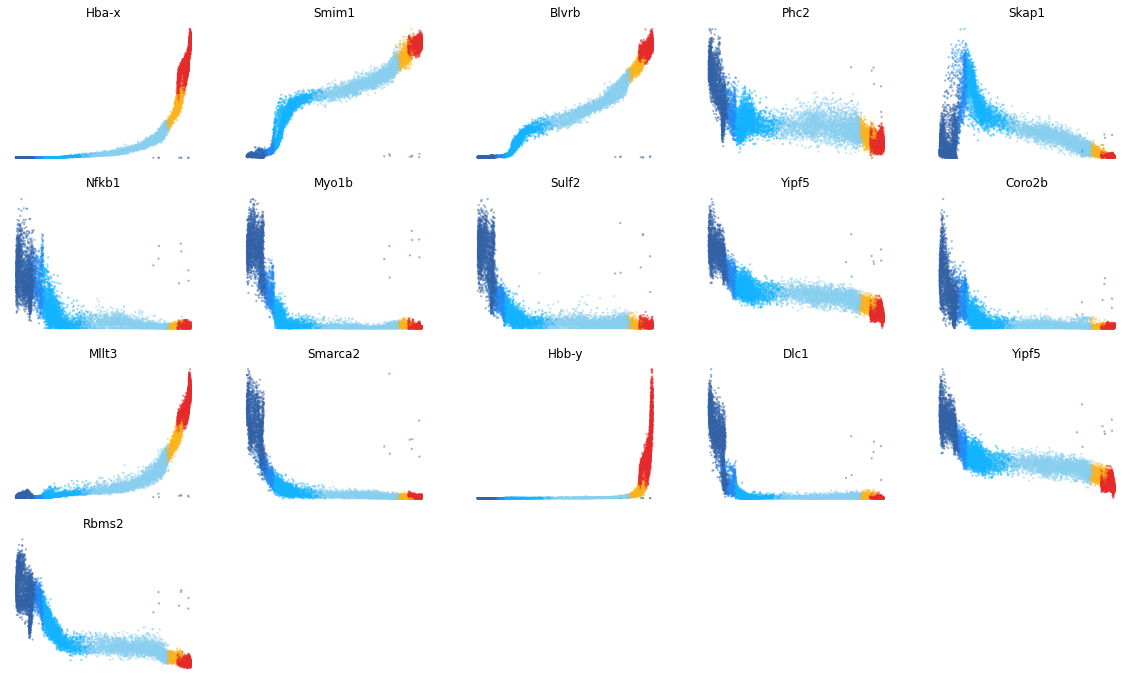

In [9]:
ncols=5
fig = plt.figure(figsize=(20,12))
for i in range(len(gene_list)):
    ax = fig.add_subplot(math.ceil(len(gene_list)/ncols), ncols, i+1)
    cdplt.gene.scatter_gene(
        ax=ax,
        x='pseudotime',
        y='spliced',
        load_cellDancer=load_cellDancer,
        save_path=None,
        custom_xlim=None,
        custom_ylim=None,
        colors=colormap.colormap_erythroid,
        alpha=0.5, 
        s = 5,
        velocity=False,
        gene_name=gene_list[i])

    ax.set_title(gene_list[i])
    ax.axis('off')

## Murk Genes Cell Velocity

In [10]:
murk_gene_pd=pd.read_csv('/Users/chen.weiqing/code/celldancer/13059_2021_2414_MOESM3_ESM.csv')
murk_gene_list=list(murk_gene_pd['index'])

In [11]:
# Set Parameters
n_neighbors=10
downsample_step=(100,100)
mode='gene'
transfer_mode='power10'
min_mass=15
grid_steps=(20,20)
custom_xlim=[-6,13]
custom_ylim=[2,16]
alpha_inside=0.3

# Compute Cell Velocity
compute_cell_velocity(load_cellDancer=load_cellDancer,
              gene_list=murk_gene_list,
              mode=mode,
              transfer_mode=transfer_mode,
              n_neighbors=n_neighbors,
              step=downsample_step)

(genes, cells): (16, 12329)
Caution! Overwriting the 'velocity' columns.
After downsampling, there are  951 cells.


,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,loss,cellID,clusters,embedding1,embedding2,pseudotime,velocity1,velocity2
0,0,Mllt3,0.061677,0.087552,0.353295,0.114199,0.199725,0.311105,0.320165,0.102612,cell_363,Blood progenitors 2,3.460521,15.574629,0.193077,NaN,NaN
1,1,Mllt3,0.056451,0.042049,0.192087,0.084563,0.207654,0.302935,0.320095,0.102612,cell_382,Blood progenitors 2,2.490433,14.971734,0.174524,NaN,NaN
2,2,Mllt3,0.073611,0.046162,0.222424,0.087551,0.207956,0.303383,0.320132,0.102612,cell_385,Blood progenitors 2,2.351203,15.267069,0.176237,NaN,NaN
3,3,Mllt3,0.142994,0.119952,0.546677,0.134357,0.191526,0.315536,0.320353,0.102612,cell_393,Blood progenitors 2,5.899098,14.388825,0.281401,NaN,NaN
4,4,Mllt3,0.136220,0.027221,0.220122,0.074768,0.210144,0.298748,0.320274,0.102612,cell_398,Blood progenitors 2,4.823139,15.374831,0.219560,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197259,12324,Yipf5,0.443361,0.098889,0.466853,0.104464,0.092566,0.197652,0.440246,0.060619,cell_139318,Erythroid3,8.032358,7.603037,0.927514,NaN,NaN
197260,12325,Yipf5,0.521375,0.092605,0.531211,0.097990,0.087018,0.196785,0.442401,0.060619,cell_139321,Erythroid3,10.352904,6.446736,0.987841,NaN,NaN
197261,12326,Yipf5,0.443695,0.108367,0.473820,0.112434,0.093452,0.197175,0.440505,0.060619,cell_139326,Erythroid3,9.464873,7.261099,0.965455,NaN,NaN
197262,12327,Yipf5,0.431785,0.067904,0.434571,0.078566,0.090097,0.199403,0.439165,0.060619,cell_139327,Erythroid3,9.990495,7.243880,0.979215,NaN,NaN


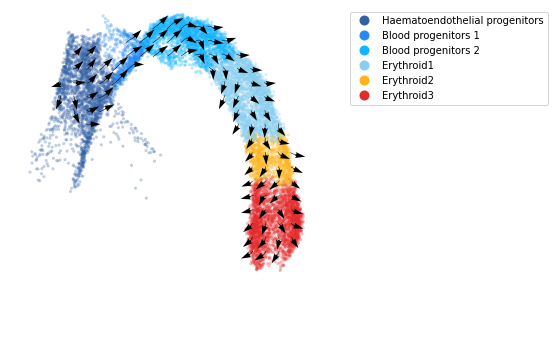

In [12]:
fig, ax = plt.subplots(figsize=(6,6))
im = cdplt.cell.scatter_cell(ax,load_cellDancer, colors=colormap.colormap_erythroid, alpha=alpha_inside, s=10,
             velocity=True, custom_xlim=custom_xlim, custom_ylim=custom_ylim, legend='on',min_mass=min_mass,grid_steps=grid_steps)
ax.axis('off')
plt.show()

In [13]:
# alpha beta gamma cluster

# Gene Velocity by Cost Rank

# UMAP using alpha, beta, and gamma

In [14]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'alpha')

In [15]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'beta')

In [16]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'gamma')

In [17]:
load_cellDancer=cdplt.cell.calculate_para_umap(load_cellDancer,'alpha_beta_gamma')

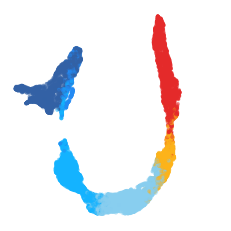

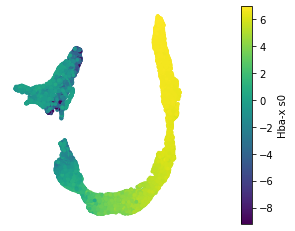

In [18]:
cdplt.cell.plot_para_umap('alpha',load_cellDancer,cluster_map=cdplt.colormap.colormap_erythroid,save_path=None,title=None)
cdplt.cell.plot_para_umap('alpha',load_cellDancer,gene_name='Hba-x',cluster_map=cdplt.colormap.colormap_erythroid ,save_path=None,title=None)

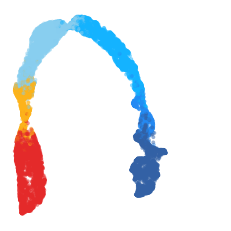

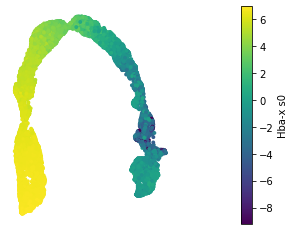

In [19]:
cdplt.cell.plot_para_umap('beta',load_cellDancer,cluster_map=cdplt.colormap.colormap_erythroid ,save_path=None,title=None)
cdplt.cell.plot_para_umap('beta',load_cellDancer,gene_name='Hba-x',cluster_map=cdplt.colormap.colormap_erythroid ,save_path=None,title=None)

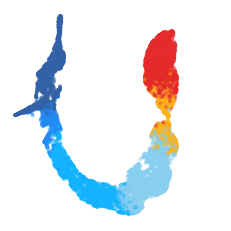

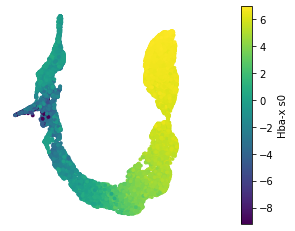

In [20]:
cdplt.cell.plot_para_umap('gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_erythroid ,save_path=None,title=None)
cdplt.cell.plot_para_umap('gamma',load_cellDancer,gene_name='Hba-x',cluster_map=cdplt.colormap.colormap_erythroid ,save_path=None,title=None)

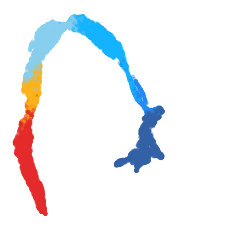

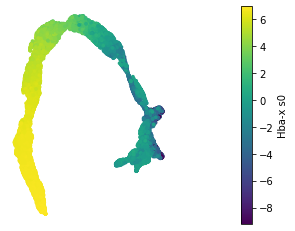

In [21]:
cdplt.cell.plot_para_umap('alpha_beta_gamma',load_cellDancer,cluster_map=cdplt.colormap.colormap_erythroid ,save_path=None,title=None)
cdplt.cell.plot_para_umap('alpha_beta_gamma',load_cellDancer,gene_name='Hba-x',cluster_map=cdplt.colormap.colormap_erythroid ,save_path=None,title=None)